In [51]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
df_path = r'X:\dl4cv_project\test_data\temp_files\props_df\*'
cell_by_OD_path = r'X:\yedidyab\dl_project\test_data\merged_cell_by_OD.raw.txt'


In [97]:
# concatenate df_prop files
dfs = []
for file in glob.iglob(df_path):
    name = '_'.join(file.split('\\')[-1].split('_')[:2])
    if 'single' in file:
        df = pd.read_csv(file)
        df['field_of_view'] = name
        dfs.append(df)
prop_df = pd.concat(dfs)

In [98]:
#load cell_by_OD
od = pd.read_csv(cell_by_OD_path, sep = '\t')[['field_of_view','cell_id','sample_name']]
od.rename(columns={'cell_id':'label', 'sample_name':'OD'}, inplace=True)


In [99]:
# merge od_df with props_df
df = od.merge(prop_df, on = ['field_of_view','label'])

# clean no signal cells
df=df[pd.to_numeric(df['OD'], errors='coerce').notnull()]

#sort by OD
df['OD'] = pd.to_numeric(df.OD)
df.sort_values(by = 'OD', inplace=True)

df

,field_of_view,label,OD,label.1,area,axis_major_length,axis_minor_length,centroid-0,centroid-1,extent,...,dapi_sum,ribo_sum,dapi_med,ribo_med,dapi_20,ribo_20,dapi_fc,ribo_fc,dapi_cv,ribo_cv
6176,fov_12,2450,0.06,2450,251,26.800382,11.953068,1438.135458,1076.745020,0.742604,...,1720505,1082144,6012.0,4085.0,5641.0,3967.0,0.398432,0.482721,0.282827,0.164907
9461,fov_13,2267,0.06,2267,323,32.319120,12.760852,1307.470588,388.049536,0.540134,...,2616147,1424464,7026.0,3338.0,6514.2,3153.4,0.412082,0.321546,0.302386,0.428585
2667,fov_11,2668,0.06,2668,319,31.647759,12.910699,1425.821317,52.304075,0.562610,...,2523534,1238294,7205.0,3390.0,6301.6,3092.6,0.456969,0.427450,0.258030,0.291475
3888,fov_12,162,0.06,162,245,25.660313,12.207568,145.861224,1627.771429,0.680556,...,1479665,808037,6031.0,3222.0,5918.4,3132.4,0.879929,0.746698,0.027581,0.074636
10034,fov_13,2840,0.06,2840,270,26.791813,12.895554,1644.762963,1969.100000,0.675000,...,1770510,884469,6442.5,3075.0,6304.8,2954.8,0.635949,0.458251,0.084204,0.203667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,fov_11,1797,6.10,1797,128,14.652044,11.112713,973.601562,106.203125,0.831169,...,811332,367362,6197.0,2831.5,5842.6,2673.0,0.656251,0.656434,0.103769,0.098363
1797,fov_11,1798,6.10,1798,204,20.939845,12.483715,974.318627,532.058824,0.666667,...,2019992,808748,8644.5,3902.0,8216.0,3663.0,0.491917,0.764399,0.250572,0.084859
1799,fov_11,1800,6.10,1800,159,19.104648,10.603969,972.163522,1904.119497,0.760766,...,1156862,468084,6786.0,2602.0,6518.6,2467.4,0.491747,0.416791,0.178570,0.267926
9572,fov_13,2378,6.10,2378,165,18.962647,11.148215,1363.454545,638.981818,0.705128,...,750422,360941,4547.0,2183.0,4452.6,2131.2,0.929368,0.851799,0.021404,0.033480


In [100]:
def plot_boxplot(df, x, y):
    sns.boxplot(x=x, y=y, data=df)
    plt.show()

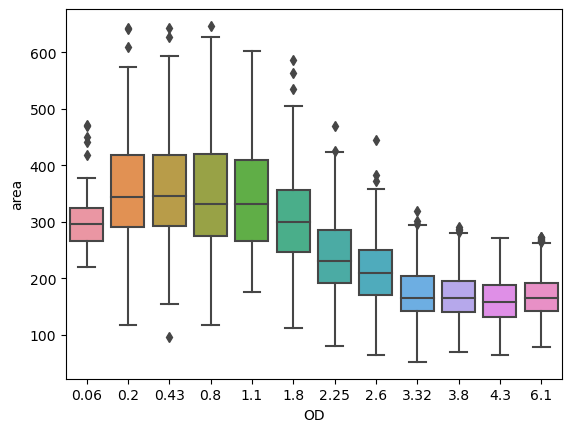

In [101]:
#plot area by OD
plot_boxplot(df, 'OD', 'area')

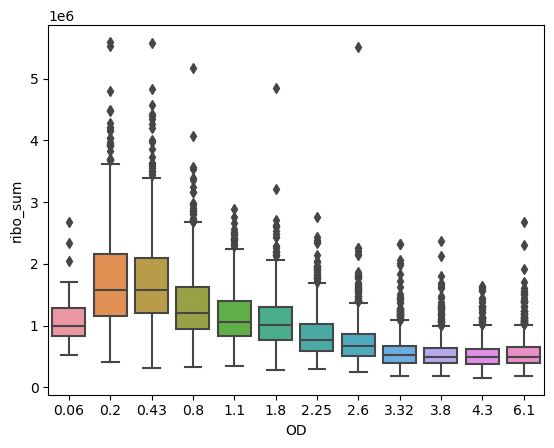

In [102]:
df.columns
plot_boxplot(df, 'OD', 'ribo_sum')

In [68]:
df[pd.to_numeric(df['OD'], errors='coerce').notnull()]

,field_of_view,label,OD,label.1,area,axis_major_length,axis_minor_length,centroid-0,centroid-1,extent,...,dapi_sum,ribo_sum,dapi_med,ribo_med,dapi_20,ribo_20,dapi_fc,ribo_fc,dapi_cv,ribo_cv
0,fov_11,1,2.25,1,149,16.588987,11.440036,43.590604,136.100671,0.846591,...,1116821,320127,6478.0,2145.0,5121.0,2075.2,0.381169,0.869376,0.346360,0.036259
2,fov_11,3,3.8,3,137,16.266383,10.735765,43.328467,796.379562,0.778409,...,1214178,545343,7879.0,3381.0,6665.4,2429.6,0.462650,0.335163,0.285324,0.397184
3,fov_11,4,2.25,4,245,25.540928,12.295010,44.040816,1167.820408,0.626598,...,1394885,605534,5073.0,2033.0,4862.8,1901.8,0.412032,0.322558,0.270419,0.394104
4,fov_11,5,3.32,5,151,17.776983,10.828773,43.913907,1978.629139,0.740196,...,660348,273472,4381.0,1799.0,4248.0,1747.0,0.914138,0.760557,0.031960,0.049361
5,fov_11,6,0.2,6,502,51.928112,12.645668,60.171315,1817.374502,0.562150,...,3733186,2281286,7083.5,4351.5,6627.4,3917.4,0.515791,0.457801,0.184957,0.215425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,fov_13,3488,4.3,3488,215,21.978923,12.465390,2001.469767,1598.506977,0.663580,...,1185097,593742,5069.0,2558.0,4888.8,2417.2,0.427343,0.385641,0.224737,0.247875
10683,fov_13,3489,3.8,3489,120,14.078020,10.876806,2000.275000,894.791667,0.779221,...,706509,378706,5896.5,3148.0,5775.4,3079.8,0.937869,0.904228,0.021194,0.031169
10684,fov_13,3490,2.25,3490,142,17.648831,10.370398,2002.514085,1766.528169,0.759358,...,740503,418921,5186.0,2932.0,5091.2,2849.2,0.893193,0.877757,0.029339,0.035930
10686,fov_13,3492,4.3,3492,125,14.128166,11.249681,2003.624000,1801.040000,0.811688,...,1153013,591641,8454.0,3925.0,7010.2,3518.2,0.518276,0.417541,0.250922,0.313332
